In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
# set global seed 
random.seed(42)


In [2]:
df_genres = pd.read_csv('../data/df_genres.csv')

genres_list = ['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [3]:
# add the red dots for the datapoints in the files: "../data/recommendations/user_recommendations_genres.pkl" and "../data/recommendations/user_recommendations_min_hash.pkl"
dict_user_recommendations_genres = pd.read_pickle('../data/recommendations/user_recommendations_genres.pkl')
dict_user_recommendations_min_hash = pd.read_pickle('../data/recommendations/user_recommendations_min_hash.pkl')
# the data is {userid: [(movieId, score), ...], ...}


In [4]:
dict_user_recommendations_genres

{304: [(50, 1.0),
  (83, 1.0),
  (142, 1.0),
  (170, 1.0),
  (196, 1.0),
  (209, 1.0),
  (335, 1.0),
  (360, 1.0),
  (366, 1.0),
  (401, 1.0),
  (475, 1.0),
  (477, 1.0),
  (492, 1.0),
  (522, 1.0),
  (606, 1.0),
  (651, 1.0),
  (698, 1.0),
  (724, 1.0),
  (728, 1.0),
  (736, 1.0),
  (800, 1.0),
  (833, 1.0),
  (932, 1.0),
  (944, 1.0),
  (966, 1.0),
  (1017, 1.0),
  (1129, 1.0),
  (1164, 1.0),
  (1424, 1.0),
  (1425, 1.0),
  (1487, 1.0),
  (1550, 1.0),
  (1558, 1.0),
  (1560, 1.0),
  (1582, 1.0),
  (1669, 1.0),
  (1730, 1.0),
  (1768, 1.0),
  (1775, 1.0),
  (1849, 1.0),
  (1870, 1.0),
  (1896, 1.0),
  (1932, 1.0),
  (1994, 1.0),
  (2026, 1.0),
  (2048, 1.0),
  (2057, 1.0),
  (2062, 1.0),
  (2114, 1.0),
  (2121, 1.0),
  (2184, 1.0),
  (2203, 1.0),
  (2273, 1.0),
  (2288, 1.0),
  (2294, 1.0),
  (2305, 1.0),
  (2311, 1.0),
  (2318, 1.0),
  (2582, 1.0),
  (2583, 1.0),
  (2643, 1.0),
  (2712, 1.0),
  (2834, 1.0),
  (2853, 1.0),
  (2890, 1.0),
  (2925, 1.0),
  (3030, 1.0),
  (3061, 1.0),
  

In [7]:
# run the pca on the genres
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df_genres[genres_list].values
# do not standardize the data
#X = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)

df = df_genres.copy()
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]



In [10]:
df

,movieId,title,genres,imdbId,tmdbId,id,description,(no genres listed),Action,Adventure,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,pca1,pca2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,114709,A cowboy doll is profoundly threatened and jea...,0,0,1,...,0,0,0,0,0,0,0,0,-0.988955,-0.792383
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,113497,When two kids find and play a magical board ga...,0,0,1,...,0,0,0,0,0,0,0,0,-0.535953,-0.328063
2,6,Heat (1995),Action|Crime|Thriller,113277,949.0,113277,A group of high-end professional thieves start...,0,1,0,...,0,0,0,0,0,1,0,0,0.244993,0.851023
3,8,Tom and Huck (1995),Adventure|Children,112302,45325.0,112302,Two best friends witness a murder and embark o...,0,0,1,...,0,0,0,0,0,0,0,0,-0.462659,-0.261133
4,9,Sudden Death (1995),Action,114576,9091.0,114576,A former fireman takes on a group of terrorist...,0,1,0,...,0,0,0,0,0,0,0,0,-0.240419,0.078920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51855,292541,The Settlers (2023),Drama|Western,10370812,989589.0,10370812,"A mixed-race Chilean, rides south on an expedi...",0,0,0,...,0,0,0,0,0,0,0,1,0.551137,-0.396520
51856,292585,Night Crawlers (2009),Comedy|Horror,985060,147230.0,985060,Blood is thicker than water in this tiny Texas...,0,0,0,...,0,0,0,0,0,0,0,0,-0.687525,0.071012
51857,292605,Our River... Our Sky (2023),Drama|War,10676126,855800.0,10676126,Baghdad. The last week of 2006. All over the c...,0,0,0,...,0,0,0,0,0,0,1,0,0.629339,-0.433644
51858,292613,Freelance (2023),Action|Comedy,15744298,897087.0,15744298,An ex special forces operator takes a job to p...,0,1,0,...,0,0,0,0,0,0,0,0,-0.533311,-0.253662


movieid 11529 not found
movieid 31857 not found
movieid 49675 not found
movieid 41967 not found
movieid 37239 not found
movieid 17681 not found
movieid 10076 not found
movieid 28814 not found
movieid 25713 not found
movieid 27507 not found
movieid 39111 not found
movieid 37037 not found
movieid 8354 not found
movieid 35952 not found
movieid 39387 not found
movieid 46792 not found
movieid 35965 not found
movieid 34261 not found
movieid 12374 not found
movieid 31641 not found
movieid 27893 not found
movieid 27055 not found
movieid 36526 not found
movieid 33664 not found
movieid 24768 not found
movieid 23021 not found
movieid 27649 not found
movieid 9504 not found
movieid 50538 not found
movieid 21833 not found
movieid 35187 not found
movieid 10050 not found
movieid 8177 not found
movieid 17494 not found
movieid 9141 not found
movieid 12684 not found
movieid 10098 not found
movieid 37200 not found
movieid 46952 not found
movieid 35845 not found
movieid 48271 not found
movieid 14117 not fo

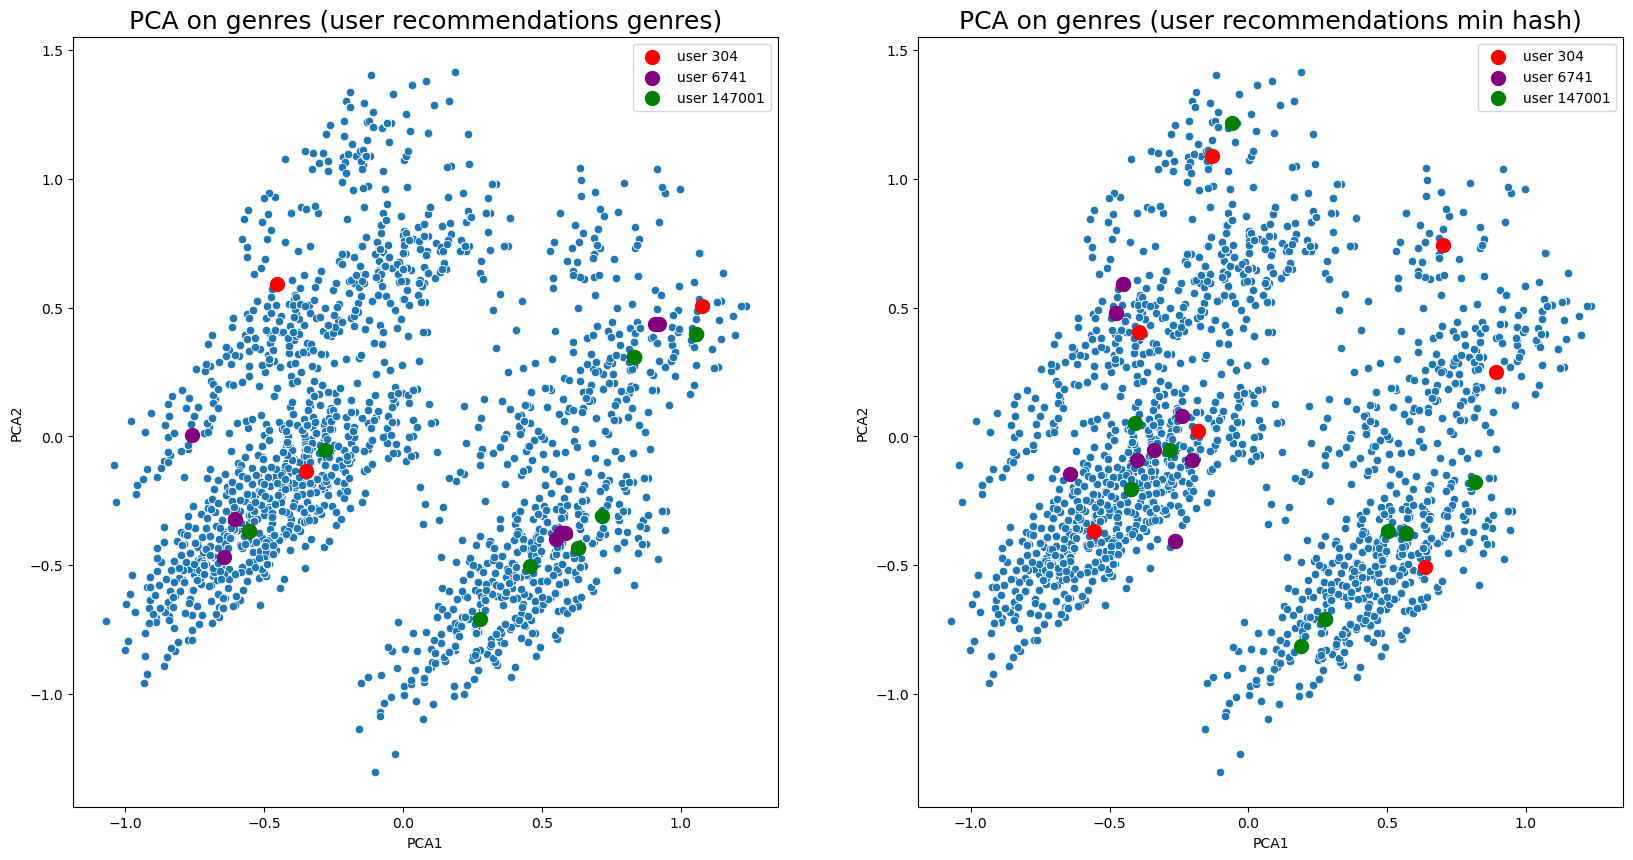

In [19]:
# Randomly sample df_user_recommendations_genres where the value of the similarity is 1
recommendations_genres_sort = {userid: [(movieid, score) for movieid, score in recommendations if score == 1] for userid, recommendations in dict_user_recommendations_genres.items()}

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
K = 10
# Plot for df_user_recommendations_genres
# set title size

sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[0])
# title size
axes[0].set_title('PCA on genres (user recommendations genres)', fontsize=18)
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

colors = ['red', 'purple', 'green']
for i, (userid, recommendations_) in enumerate(recommendations_genres_sort.items()):
    legend_added = False
    random.seed(42)
    recommendations = random.sample(recommendations_, 1000)
    count_dots = 0
    for movieid, score in recommendations:
        if count_dots >= K:
            break
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            title = df[df['movieId'] == movieid]['title'].values[0]
            if not legend_added:
                axes[0].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[0].scatter(x, y, color=colors[i], s=100)
            #axes[0].text(x, y, title, fontsize=11, color=colors[i], weight='bold')
            count_dots += 1
        except:
            print(f"movieid {movieid} not found")

axes[0].legend()

# Plot for df_user_recommendations_min_hash
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[1])
axes[1].set_title('PCA on genres (user recommendations min hash)', fontsize=18)
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

for i, (userid, recommendations) in enumerate(dict_user_recommendations_min_hash.items()):
    legend_added = False
    for movieid, score in recommendations[:K]:
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            title = df[df['movieId'] == movieid]['title'].values[0]
            if not legend_added:
                axes[1].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[1].scatter(x, y, color=colors[i], s=100)
            
            # use color to differentiate the users and make bold
            #axes[1].text(x, y, title, fontsize=11, color=colors[i], weight='bold')
        except:
            print(f"movieid {movieid} not found")

axes[1].legend()

plt.show()

[0.15836109 0.12812539]
0.28648647970950714


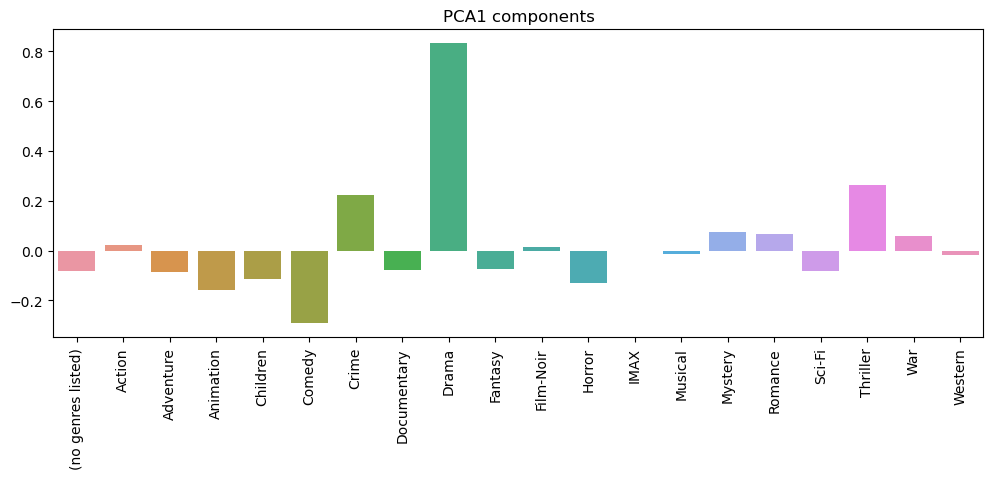

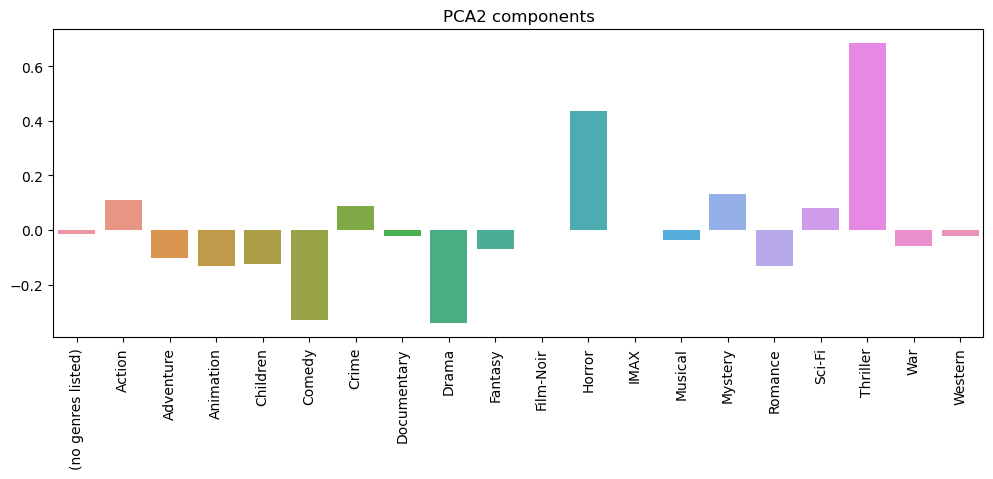

In [9]:
# print explained variance
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PCA1 components')
plt.show()

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[1])
plt.xticks(rotation=90)
plt.title('PCA2 components')
plt.show()
